## 주식 데이터분석

### 주식을 데이터 분석하기전 우리나라의 지수를 먼저 파악한 후 현재 제일인기 있는 종목인 LG에너지솔루션
### 관련 기사를 웹크롤링해서 가장 인기 있는 검색어를 도출 하고 워드 클라우드 시각화를 해서
### 종목의 차트 분석 및 매수/매도 타이밍 도출이 목표.


## 1.우리나라의 지수 파악하기  kospi 최대 손실 낙폭

In [33]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  1 of 1 completed


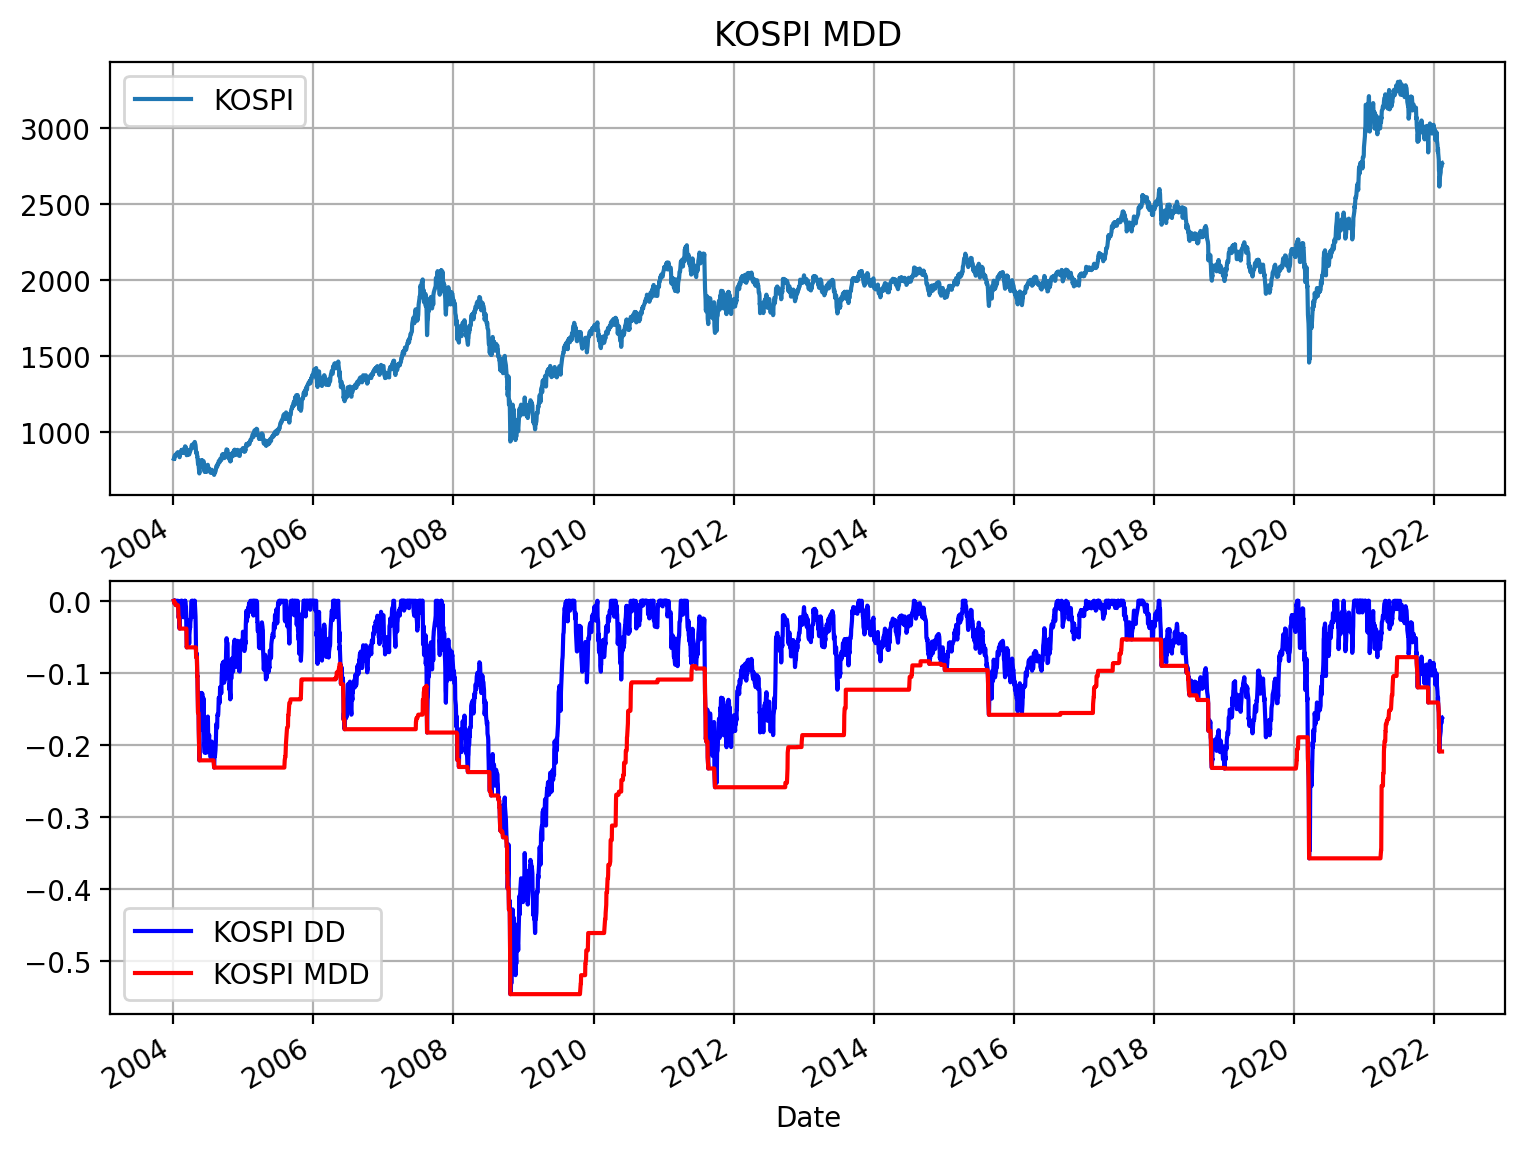

In [35]:
#코스피의 MDD(Maximum Draw Down)고점 대비 최대 손실폭 구하기  최저점-최고점/최저점
#rolling() 함수는 시리즈에서 윈도우 크기에 해당하는 개수만큼 데이터를 추출하여 집계 함수에 해당하는 연산 실시
#집계함수로는 최대값max(), 평균값mean(), 최솟값min(),을 사용할수 있다

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt

kospi=pdr.get_data_yahoo('^KS11', '2004-01-04') # 코스피지수 데이터를 다운. 코스피지수의 심볼은 ^KS11이다.

window=252  #산정 기간에 해당하는 window값은 1년 동안의 개장일을 252일로 어림잡아 설정함.
peak=kospi['Adj Close'].rolling(window, min_periods=1).max()  #코스피 종가 칼럼에서 1년(거래일 기준)기간 단위로 최고치 peak를 구함.
drawdown=kospi['Adj Close']/peak -1.0  # drawdown은 최고치(peak)대비 현재 코스피 종가가 얼마나 하락했는지를 구함.
max_dd=drawdown.rolling(window, min_periods=1).min() #drawdown은 1년 기간 단위로 최저치 max_dd를 구함.  마이너스값이기 때문에 최저치가 최대 손실 낙폭.

plt.figure(figsize=(9,7))
plt.subplot(211) #2행 1열중 1행을 그린다.
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True)
plt.subplot(212) #2행 1열중 2행에 그린다.
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True)
max_dd.plot(c='red',label='KOSPI MDD', grid=True, legend=True)
plt.show()






In [36]:
#서브프라임 금융 위기 당시 2008년 10월 24일에 코스피 지수가 10.57% 하락하면서 MDD가 -54.5% 를 기록함

max_dd.min()

-0.5453665130144085

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


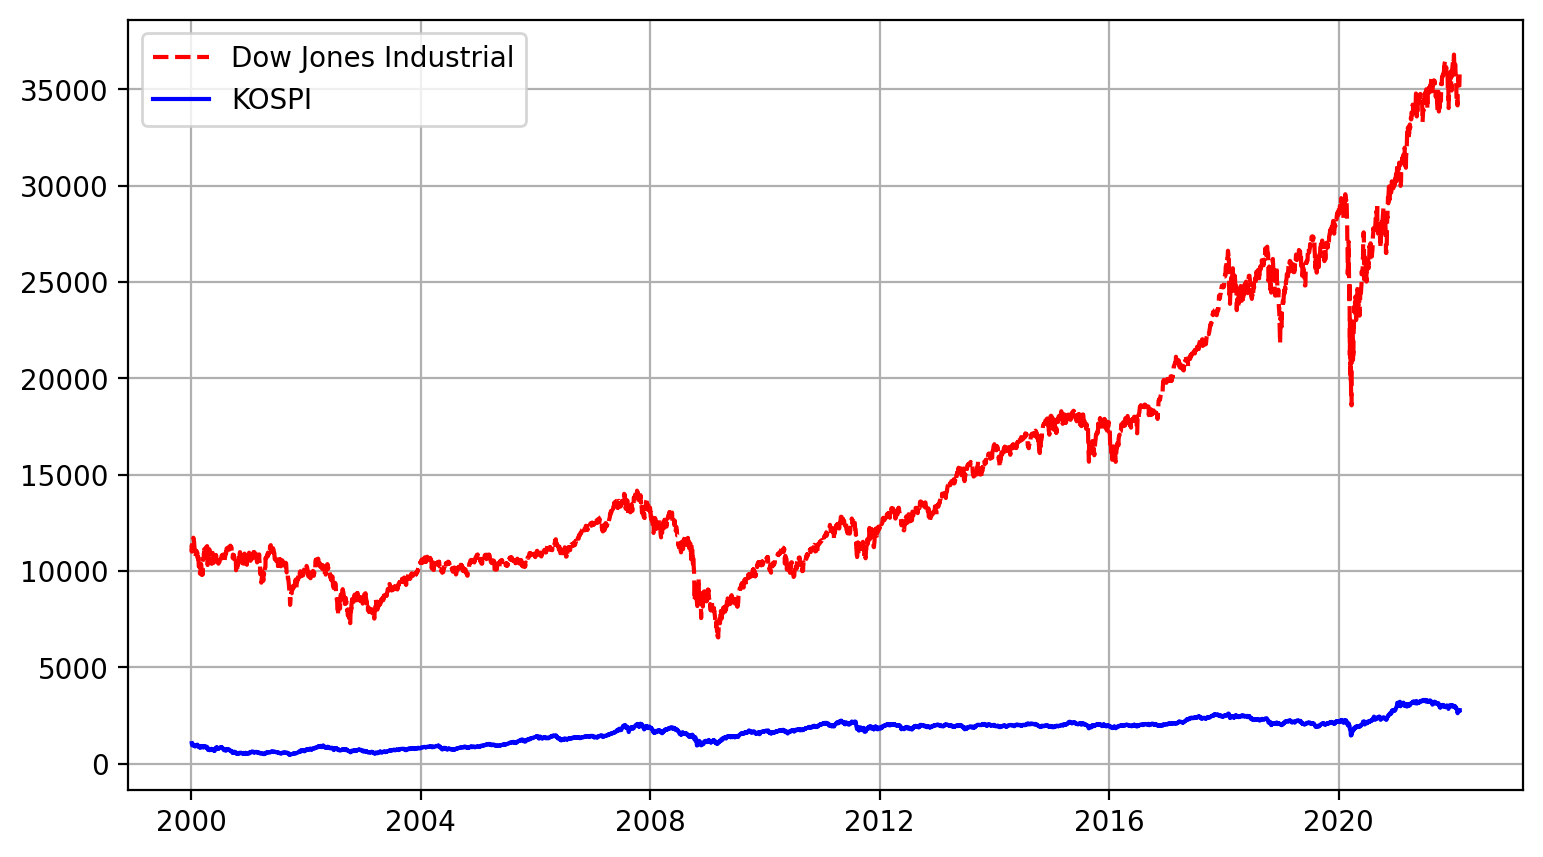

In [37]:
#코스피와 다우존스 지수 비교

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()


dow=pdr.get_data_yahoo('^DJI','2000-01-04')
kospi=pdr.get_data_yahoo('^KS11', '2000-01-04')

import matplotlib.pyplot as plt
plt.figure(figsize=(9,5))
plt.plot(dow.index, dow.Close, 'r--', label='Dow Jones Industrial') #다우존스 지수를 붉은 점선으로 출력한다.
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')  #코스피를 푸른 실선으로 출력.
plt.grid(True)
plt.legend(loc='best')
plt.show()

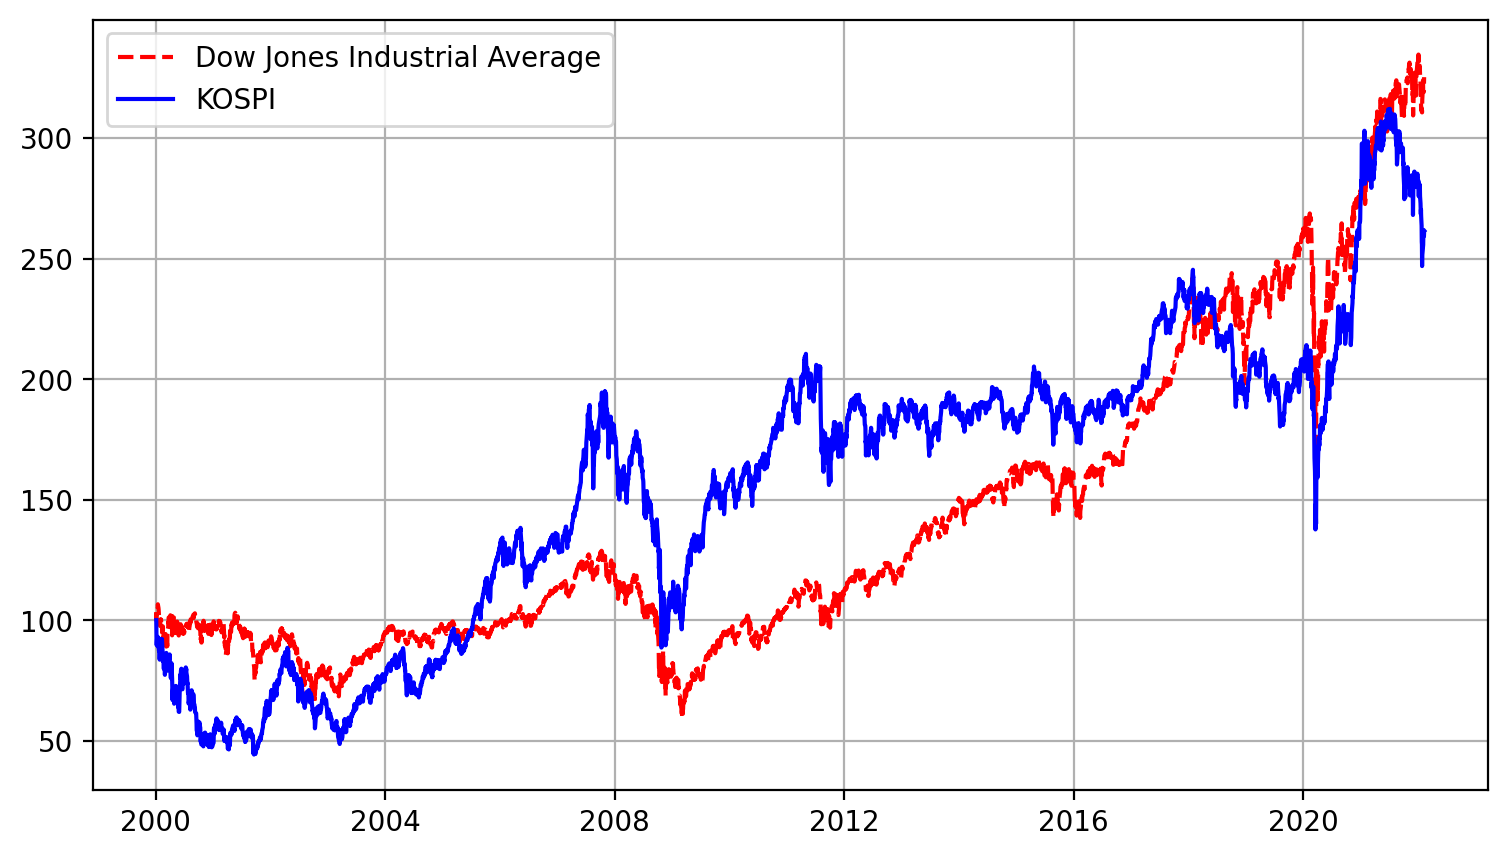

In [38]:
#지수 기준값이 달라서, 어느 지수가 더 좋은 성과를 냈는지를 한눈에 알아보기 어렵다.
#일별 종가만으로는 코스피와 다우존스 지수의 상관관계를 비교하기가 어려웠다.
#이번에는 현재 종가를 특정 시점의 종가로 나누어 변동률을 구함

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()


d=(dow.Close / dow.Close.loc['2000-01-04'])*100   #금일 다우존스 지수를 2000년 1월 4일 다우존스 지수로 나눈 뒤 100을 곱한다.
k=(kospi.Close / kospi.Close.loc['2000-01-04'])*100 #금일 코스피 지수를 2000년 1월 4일 코스피 지수로 나눈 뒤 100을 곱한다.

import matplotlib.pyplot as plt
plt.figure(figsize=(9,5))
plt.plot(d.index, d, 'r--', label='Dow Jones Industrial Average') #다우존스 지수를 붉은 점선으로 출력한다.
plt.plot(k.index, k, 'b', label='KOSPI')  #코스피를 푸른 실선으로 출력.
plt.grid(True)
plt.legend(loc='best')
plt.show()

## 미국의 다우존스와 코스피 지수가 비슷하게 흘러가고 있지만, 최근에는 코스피가 훨씬 
## 밀리고 있다. 그래서 우리나라의 시총1위인 삼성전자와 코스피를 비교 해본다.

## 우선 LG에너지솔루션을 분석하고 싶지만 오늘 상장이라 데이터가 너무 부족해서 삼성으로함.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


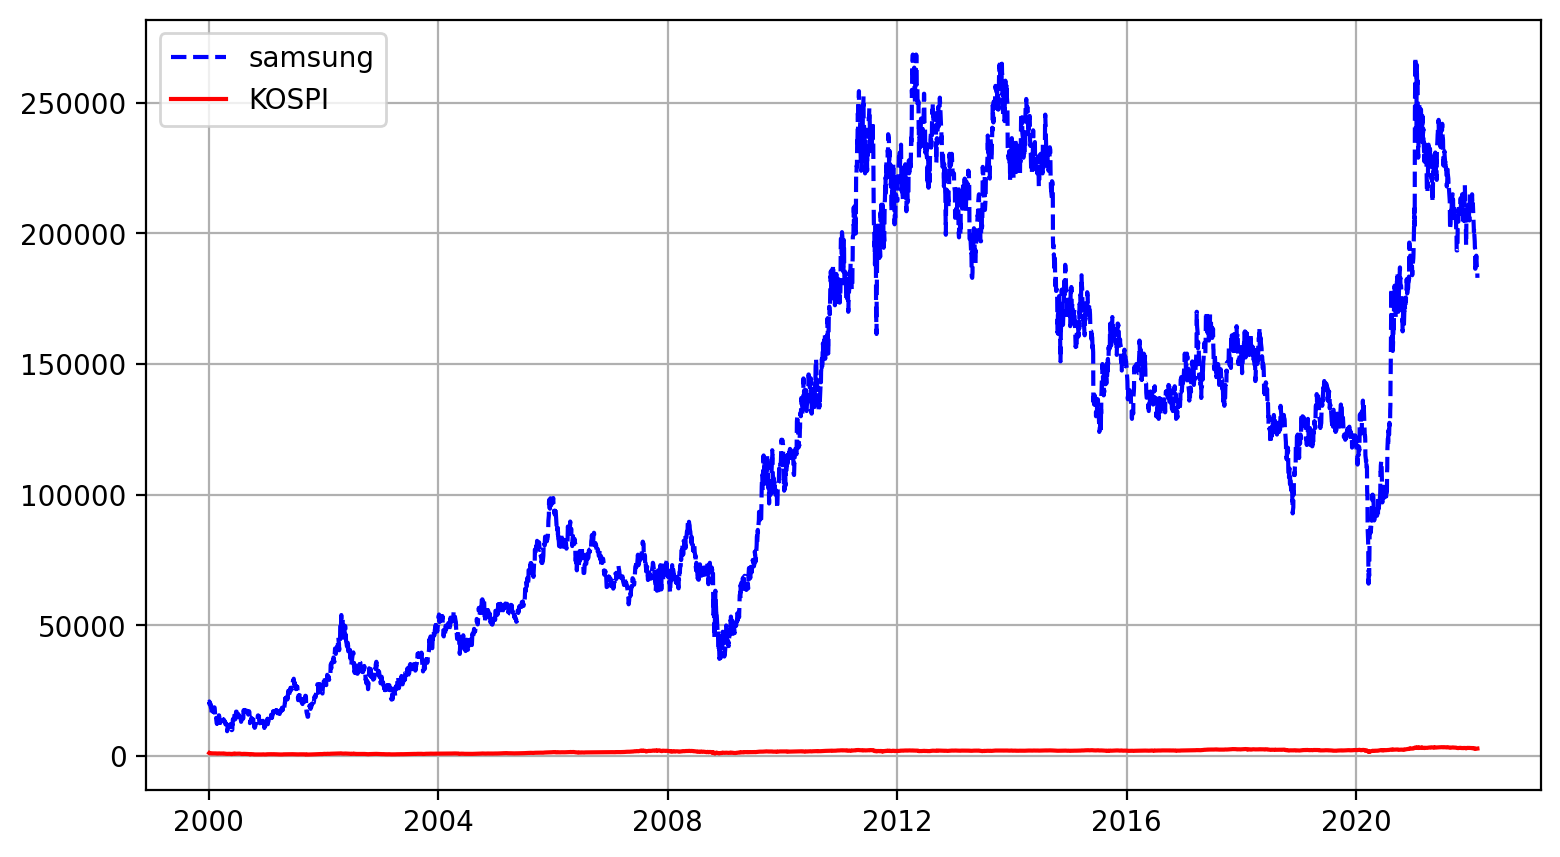

In [39]:
#코스피와 다우존스 지수 비교

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()


samsung=pdr.get_data_yahoo('005380.KS','2000-01-04')
kospi=pdr.get_data_yahoo('^KS11', '2000-01-04')

import matplotlib.pyplot as plt
plt.figure(figsize=(9,5))
plt.plot(samsung.index, samsung.Close, 'b--', label='samsung') #다우존스 지수를 붉은 점선으로 출력한다.
plt.plot(kospi.index, kospi.Close, 'r', label='KOSPI')  #코스피를 푸른 실선으로 출력.
plt.grid(True)
plt.legend(loc='best')
plt.show()

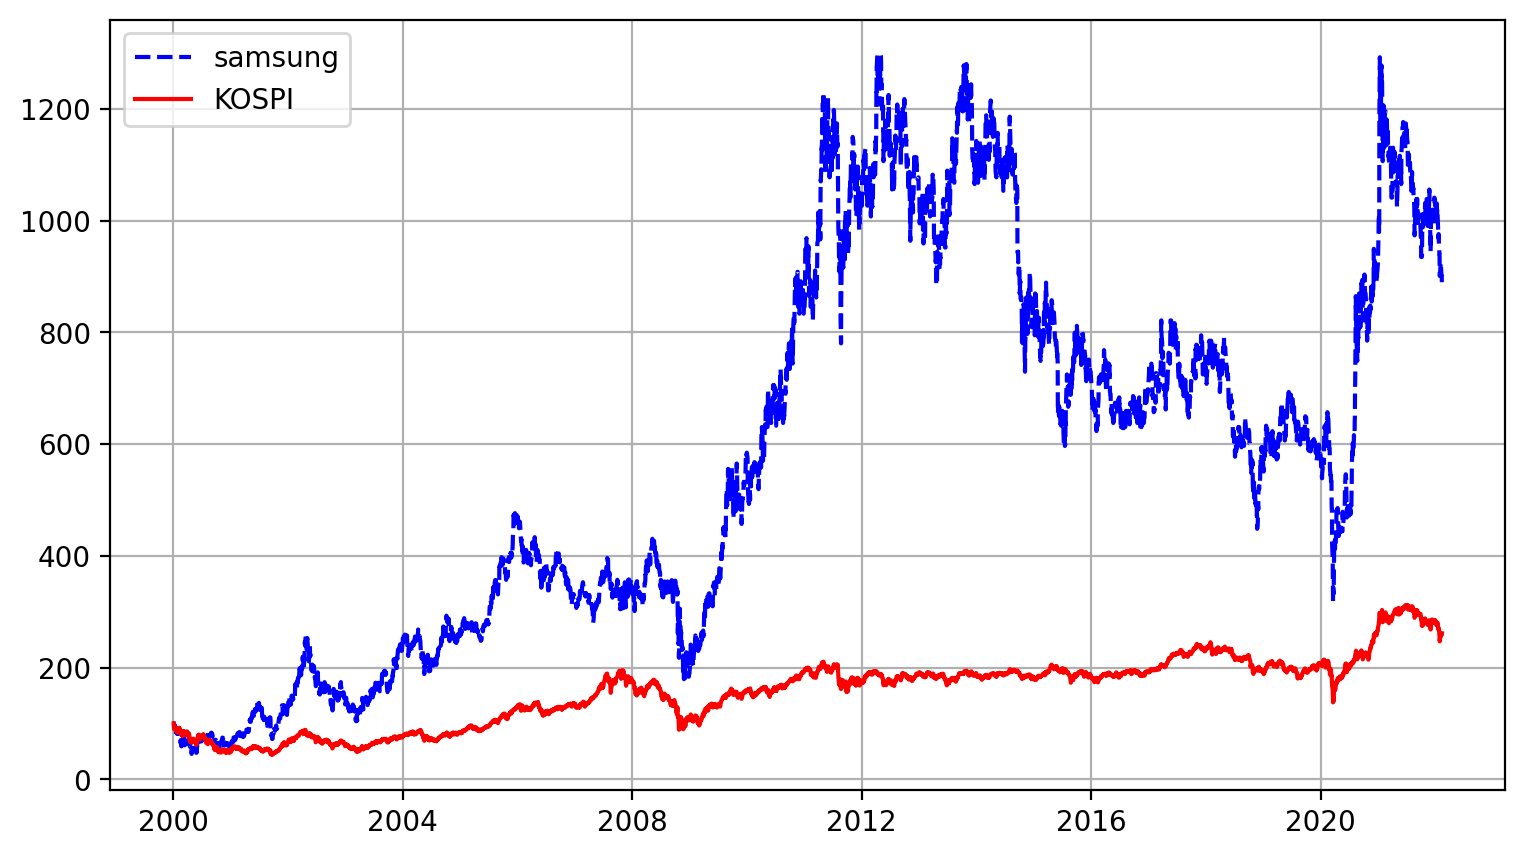

In [40]:
#지수 기준값이 달라서, 어느 지수가 더 좋은 성과를 냈는지를 한눈에 알아보기 어렵다.
#일별 종가만으로는 코스피와 삼성전자의 상관관계를 비교하기가 어려웠다.
#이번에는 현재 종가를 특정 시점의 종가로 나누어 변동률을 구함

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()


s=(samsung.Close / samsung.Close.loc['2000-01-04'])*100   #금일삼성전자 지수를 2000년 1월 4일 삼성전자 지수로 나눈 뒤 100을 곱한다.
k=(kospi.Close / kospi.Close.loc['2000-01-04'])*100 #금일 코스피 지수를 2000년 1월 4일 코스피 지수로 나눈 뒤 100을 곱한다.

import matplotlib.pyplot as plt
plt.figure(figsize=(9,5))
plt.plot(s.index, s, 'b--', label='samsung') #삼성전자 지수를 붉은 점선으로 출력한다.
plt.plot(k.index, k, 'r', label='KOSPI')  #코스피를 푸른 실선으로 출력.
plt.grid(True)
plt.legend(loc='best')
plt.show()

## 2.네이버뉴스 에서 lg에너지솔루션 관련 기사 웹크롤링 해서 워드클라우드 시각화 하기

pip install selenium

pip install beautifulsoup4

In [41]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [42]:
"""네이버 뉴스 기사 웹 크롤러 모듈"""
 
from bs4 import BeautifulSoup   #라이브러리 불러오기
import urllib.request
 
# 출력 파일 명
OUTPUT_FILE_NAME = 'output.txt'

# 긁어 올 URL  url주소를 백 슬래시를 사용해 두 줄로 나누었음. 이는 한 행이 80자 넘어가지 않게 하기위함.
# 네이버에 lg에너지 솔루션 최근 기사 하나를 불러옴.
URL='https://finance.naver.com/news/news_read.naver?article_id=0005036548&office_id=277'\
    '&mode=mainnews&type=&date=2022-01-27&page=1'

 
# 크롤링 함수  해당 url주소로 요청을 보내고 받아 기사 내용을 파싱해서 하나의 문자열로 저장하는 함수.
# 1.우선 urlopen메서드를 통해서 url주소에 대한 요청을 보내 source_code_from_URL 변수에 그 결과를 저장.
# 2.그 후 html코드를 파싱하기 위해 source_code_from_URL를 이용, beautifulSoup객체를 생성해 soup에 할당.
# 3.beautifulSoup객체 생성자의 2번째 인자로 'lxml'을 사용해 기존 'html'방식 대신 'lxml'방식으로 파싱을 함.
# 3.1 그리고 한글 내용이 포함된 기사이기 때문에 from_encoding을 이용해 키워드 인자 cp949 넣어 인코딩함.
# 4. 'lxml'방식으로  beautifulsoup 객체를 생성할때 오류나면 lxml라이브러리를 설치하면됨.
# 5. soup객체에서 원하는 부분(html요소)만 가지고 와야함. 
# 5.1 id가 contentarea인 div클래스 안에 담겨 있음을 알수 있음.
# 5.2 그래서 우리가 생성한 객체 soup에서 위에서의 'div'클래스를 가져오면됨.

def get_text(URL):
    source_code_from_URL = urllib.request.urlopen(URL)
    soup = BeautifulSoup(source_code_from_URL, 'lxml', from_encoding='cp949')
    text = ''     #우선 본문 내용을 저장하기 위해 text에 빈 문자열을 할당함.
    for item in soup.find_all('div', id='contentarea'):  #이후, soup객체의 find_all메서드를 통해 모두 뽑아냄.
        text = text + str(item.find_all(text=True))  #for 문으로 뽑힌 각 요소에 item에 find_all메서드 사용,
    return text    #텍스트 키워드 인자에 true를 넣어 텍스트 요소만 뽑아 문자열로 치환, text문자열에 이어 붙임.
 #그 후 텍스트를 반환
 
# 메인 함수

def main():
    open_output_file = open(OUTPUT_FILE_NAME, 'w')
    result_text = get_text(URL)
    open_output_file.write(result_text)
    open_output_file.close()

    
#메인 함수를 별도를 만들고 ___name___을 이용해 main 함수를 실행시킴.
#메인 함수에서 위에서 할당한 output_file_name상수를 통해 txt파일을 생성, get_text함수를 사용해
# 기사내용을 result_text에 할당함.
# 이후 , 오픈한 output_file에 기사를 쓰고 닫음.


if __name__ == '__main__':
    main()
    
    
    
    


In [43]:
# 텍스트 정제 모듈
# 영어, 특수기호 모두 제거

#정규표현식을 활용하기위해 're'라이브러리를 임포트함. 
import re
 
#정제할 파일이름을 input_file_name으로,
#결과 파일의 이름을 output_file_name 으로 할당.
# 입,출력 파일명
INPUT_FILE_NAME = 'output.txt'
OUTPUT_FILE_NAME = 'output_cleand.txt'
 

#문자열을 입력받아 영어와 특수문자를 제거하는 클리닝 함수정의
# 클리닝 함수
def clean_text(text):
    cleaned_text = re.sub('[a-zA-Z]', '', text)  #대소문자 영어를 제거하는 코드.
    cleaned_text = re.sub('[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]',
                          '', cleaned_text)  #특수문자를 제거하는 코드.
    return cleaned_text
    
 
 # 메인 함수
def main():
    read_file = open(INPUT_FILE_NAME, 'r')
    write_file = open(OUTPUT_FILE_NAME, 'w')
    text = read_file.read()
    text = clean_text(text)
    write_file.write(text)
    read_file.close()
    write_file.close()
 
 #이번 모듈도 main정의, 여기서는 clean_text함수를 이용해 본문 내용을 정제함.
if __name__ == "__main__":
    main() 

## 위에서 정제한 output_cleand.txt를 이용해 워드 클라우드 시작하기

In [44]:
#워드클라우드를 이용하기위해 패키지 불러오기
#twitter는 konlpy의 여러 패키지 중 하나로 형태소를 분석해줌.
#counter는 단어를 카운팅 해주는 패키지.
from konlpy.tag import Twitter 
from collections import Counter

In [45]:
#클라우드로 만들 텍스트 파일 불러오기/ 'r'파일을 읽겠다.
file = open("../220127/output_cleand.txt", "r", encoding="cp949") 
#readlines로 불러오면 아래와 같이 리스트 형태로 글이 출력됨.
lists = file.readlines() 
file.close()
lists

['  컨텐츠      로케이터    금융홈    뉴스   주요뉴스   로케이터   주요뉴스   타이틀 우측 티커 영역        10   1    10   1                           0                      0    1   1    1    3000    3000   속보   인공지능팩토리 10억원 규모 프리    거리두기 연장에 포장재 빛 보나…관   특징주  28 ↑…국제 유가    특징주 키다리스튜디오 틱톡 모회   특징주 이노베이션 국제유가 상   외국인·기관 ‘쌍끌이 매수’에 코   아마존닷컴 실적 괜찮네 주가 급반   특징주 엔솔 이틀째 상승…장중   부고 이석구전 아일인텐 이사씨    국제유가 7년 만에 최고…정유주 강           로케이션바 추가     인쇄    글자크기   글꼴           본문 텍스트 작게  본문 텍스트 크게      로케이션바 추가     게시판 뷰      언론사 로고       언론사 로고    기사제목  기재일     기사제목          굿모닝 증시엔솔 데뷔로 변동성 확대·매파적인 파월…외국인 수급 변수        기사제목    기사입력 20220127 0816  기사원문      좋아요  훈훈해요       3 슬퍼요       2 화나요       1 후속기사 원해요   좋아요 평가하기  공감        좋아요  0       훈훈해요  0       슬퍼요  0       화나요  0       후속기사 원해요  0          댓글수표기가 숫자일때 에 클래스 추가   댓글          기사 상단 요점    기사본문    27일 국내 증시는 기업공개 사상 최대어로 꼽히는 에너지솔루션이 코스피 시장에 데뷔해 수급 변동성 확대가 불가피할 것으로 보인다 전반적인 투자심리가 외축된 점을 감안할 때 매물 출회 가능성이 높아 하락 출발이 예상된다 다만 저가 매수 유입도 기대할 수 있을 것으로 전망된다  미국 뉴욕증시는 26일현지시간 제롬 파월 연방준비제도

In [46]:
#형태소나누기
twitter = Twitter() 
morphs = []  #morphs=[]라는 빈 리스트를 만들고 그 리스트에 append한다.
#무엇을? lists에 있는 (sentence)의 형태소를 분석한 (twitter)결과를.
for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 

print(morphs)
#조사,명사,부사 등등 단어와 형태로 나누어 리스트가 형성.

[[('컨텐츠', 'Noun'), ('로', 'Noun'), ('케이', 'Noun'), ('터', 'Noun'), ('금융', 'Noun'), ('홈', 'Noun'), ('뉴스', 'Noun'), ('주요', 'Modifier'), ('뉴스', 'Noun'), ('로', 'Noun'), ('케이', 'Noun'), ('터', 'Noun'), ('주요', 'Modifier'), ('뉴스', 'Noun'), ('타이틀', 'Noun'), ('우측', 'Noun'), ('티', 'Noun'), ('커', 'Verb'), ('영역', 'Noun'), ('10', 'Number'), ('1', 'Number'), ('10', 'Number'), ('1', 'Number'), ('0', 'Number'), ('0', 'Number'), ('1', 'Number'), ('1', 'Number'), ('1', 'Number'), ('3000', 'Number'), ('3000', 'Number'), ('속보', 'Noun'), ('인공', 'Noun'), ('지능', 'Noun'), ('팩토리', 'Noun'), ('10억원', 'Number'), ('규모', 'Noun'), ('프리', 'Noun'), ('거리', 'Noun'), ('두기', 'Noun'), ('연장', 'Noun'), ('에', 'Josa'), ('포장재', 'Noun'), ('빛', 'Noun'), ('보나', 'Noun'), ('…', 'Punctuation'), ('관', 'Noun'), ('특징', 'Noun'), ('주', 'Noun'), ('28', 'Number'), ('↑', 'Foreign'), ('…', 'Punctuation'), ('국제', 'Noun'), ('유가', 'Noun'), ('특징', 'Noun'), ('주', 'Noun'), ('키다리', 'Noun'), ('스튜디오', 'Noun'), ('틱톡', 'Noun'), ('모', 'Modifier'), ('회', 'No

In [47]:
#여기서 명사,형용사,부사만 골라낼거다.
# *sentence는 for 함수안에서만 쓰이는 함수라 위에꺼랑은 상관없음.
#morph라는 리스트를 만들었고, 이 리스트 안에 쉼표로 구분된 두 가지 데이터가 담겨있다.
#ex) ('주식','Noun')
#if 태그 안에 명사,형용사,부사가 있으면 내가 만든 빈 리스트 (noun_adj_adv_list)에 앞의 단어 (word)를
# 추가(append)한다. 워드 클라우드에 필요없는 '것','나','내' 는 제외.

noun_adj_adv_list=[] 

for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Noun'] and ("것" not in word) and ("내" not in 
word)and ("나" not in word)and ("수"not in word) and("게"not in 
word)and("말"not in word): 
            noun_adj_adv_list.append(word) 

print(noun_adj_adv_list)
#내가 만든 조건에 충족하는 word만 출력된 리스트다.


['컨텐츠', '로', '케이', '터', '금융', '홈', '뉴스', '뉴스', '로', '케이', '터', '뉴스', '타이틀', '우측', '티', '영역', '속보', '인공', '지능', '팩토리', '규모', '프리', '거리', '두기', '연장', '포장재', '빛', '관', '특징', '주', '국제', '유가', '특징', '주', '키다리', '스튜디오', '틱톡', '회', '특징', '주', '이노베이션', '국제', '유가', '상', '외국인', '기관', '쌍끌이', '코', '아마존닷컴', '실적', '주가', '급반', '특징', '주', '엔솔', '이틀', '상승', '장', '부고', '구전', '이사', '국제', '유가', '최고', '정', '유주', '강', '로케이션', '바', '추가', '인쇄', '글자', '크기', '글꼴', '본문', '텍스트', '본문', '텍스트', '로케이션', '바', '추가', '뷰', '언론사', '로고', '언론사', '로고', '기사', '제목', '재일', '기사', '제목', '굿모닝', '증시', '솔', '데뷔', '변동성', '확대', '파적', '파월', '외국인', '기사', '제목', '기사', '입력', '기사', '원문', '후속', '기사', '평가', '공감', '후속', '기사', '댓글', '표기', '숫자일', '때', '클래스', '추가', '댓글', '기사', '상단', '요점', '기사', '본문', '증시', '기업', '공개', '사상', '최대', '에너지', '솔루션', '코스피', '시장', '데뷔', '변동성', '확대', '전반', '투자', '심리', '외축', '점', '감안', '때', '매물', '회', '가능성', '하락', '출발', '예상', '다만', '저가', '유입', '전망', '미국', '뉴욕증시', '제롬', '파월', '연방', '준비', '제도', '준', '의장', '금리', '인상', '예고', '

In [48]:
#빈도수대로 정렬
#counter는 카운팅 해주는 패키지. 
#이를 내가 만든 최종 리스트(noun_adj_adv_list)에 적용시킨다. 
count = Counter(noun_adj_adv_list)

In [49]:
#단어와 빈도수가 함께 나오는 딕셔너리 생성.
words = dict(count.most_common())
words

{'뉴스': 15,
 '기사': 14,
 '증시': 11,
 '시장': 11,
 '금리': 11,
 '점': 9,
 '준': 9,
 '인상': 9,
 '주': 7,
 '때': 7,
 '하락': 7,
 '더': 7,
 '긴축': 7,
 '확대': 6,
 '파월': 6,
 '전망': 6,
 '폭락': 6,
 '언론사': 5,
 '코스피': 5,
 '심리': 5,
 '예상': 5,
 '미국': 5,
 '의장': 5,
 '이후': 5,
 '언급': 5,
 '부담': 5,
 '발표': 5,
 '이전': 5,
 '등': 5,
 '경우': 5,
 '페북': 5,
 '특징': 4,
 '국제': 4,
 '회': 4,
 '외국인': 4,
 '추가': 4,
 '변동성': 4,
 '파적': 4,
 '에너지': 4,
 '솔루션': 4,
 '투자': 4,
 '포인트': 4,
 '점도': 4,
 '우려': 4,
 '양적': 4,
 '및': 4,
 '경제': 4,
 '일': 4,
 '보기': 4,
 '로': 3,
 '홈': 3,
 '우측': 3,
 '유가': 3,
 '상': 3,
 '실적': 3,
 '주가': 3,
 '장': 3,
 '본문': 3,
 '제목': 3,
 '후속': 3,
 '전반': 3,
 '감안': 3,
 '매물': 3,
 '가능성': 3,
 '저가': 3,
 '뉴욕증시': 3,
 '날': 3,
 '거래': 3,
 '회의': 3,
 '직후': 3,
 '통해': 3,
 '후': 3,
 '영향': 3,
 '대한': 3,
 '변화': 3,
 '이': 3,
 '기록': 3,
 '해당': 3,
 '아시아': 3,
 '페이지': 3,
 '묶음': 3,
 '연속': 3,
 '메타': 3,
 '인기': 3,
 '검색어': 3,
 '컨텐츠': 2,
 '케이': 2,
 '터': 2,
 '인공': 2,
 '지능': 2,
 '규모': 2,
 '기관': 2,
 '엔솔': 2,
 '상승': 2,
 '로케이션': 2,
 '바': 2,
 '인쇄': 2,
 '텍스트': 2,
 '뷰': 2,
 '로고': 

In [18]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [50]:
#워드클라우드 생성하기 위해 패키지 설치
#nltk는 형태소 분석 패키지
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

#밑에는 그래프의 디스플레이 설정에 관한 코드
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'NanumGothic') 

set_matplotlib_formats('retina') 
# 제일 밑에있는거는 그래프에 음수의 수치를 보여줄 때 오류가 나는 것을 방지하는 코드
matplotlib.rc('axes',unicode_minus = False)


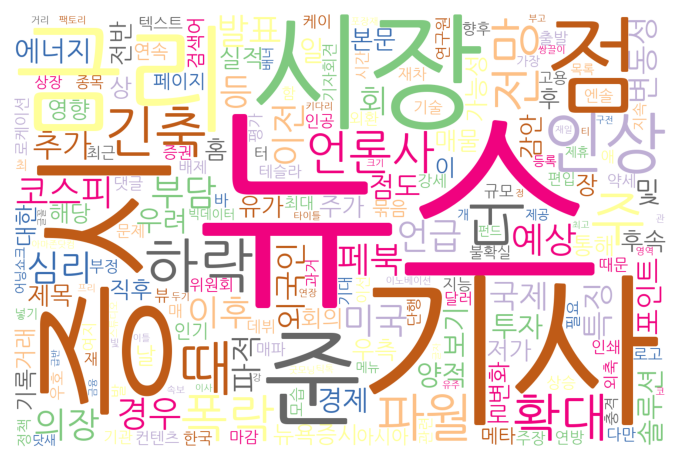

In [51]:
wordcloud = WordCloud(font_path='NanumGothic', 
background_color='white',colormap = "Accent_r", 
                    width=1500, 
height=1000).generate_from_frequencies(words) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()



In [21]:
!pip install pillow

In [52]:
# 구글에 wordcloud mask image

import numpy as np
from PIL import Image
from wordcloud import STOPWORDS

starwars=np.array(Image.open("starwars.png"))

stopwords=set(STOPWORDS)
stopwords.add("said")

In [53]:
starwars

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

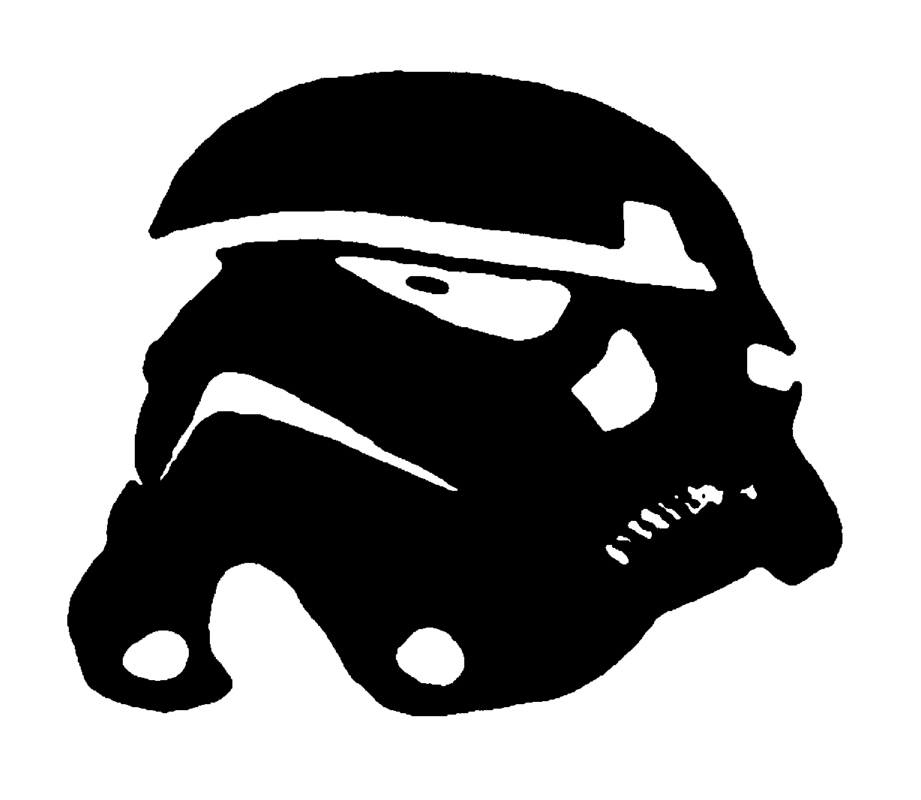

In [54]:
plt.figure(figsize=(8,8))
plt.imshow(starwars, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

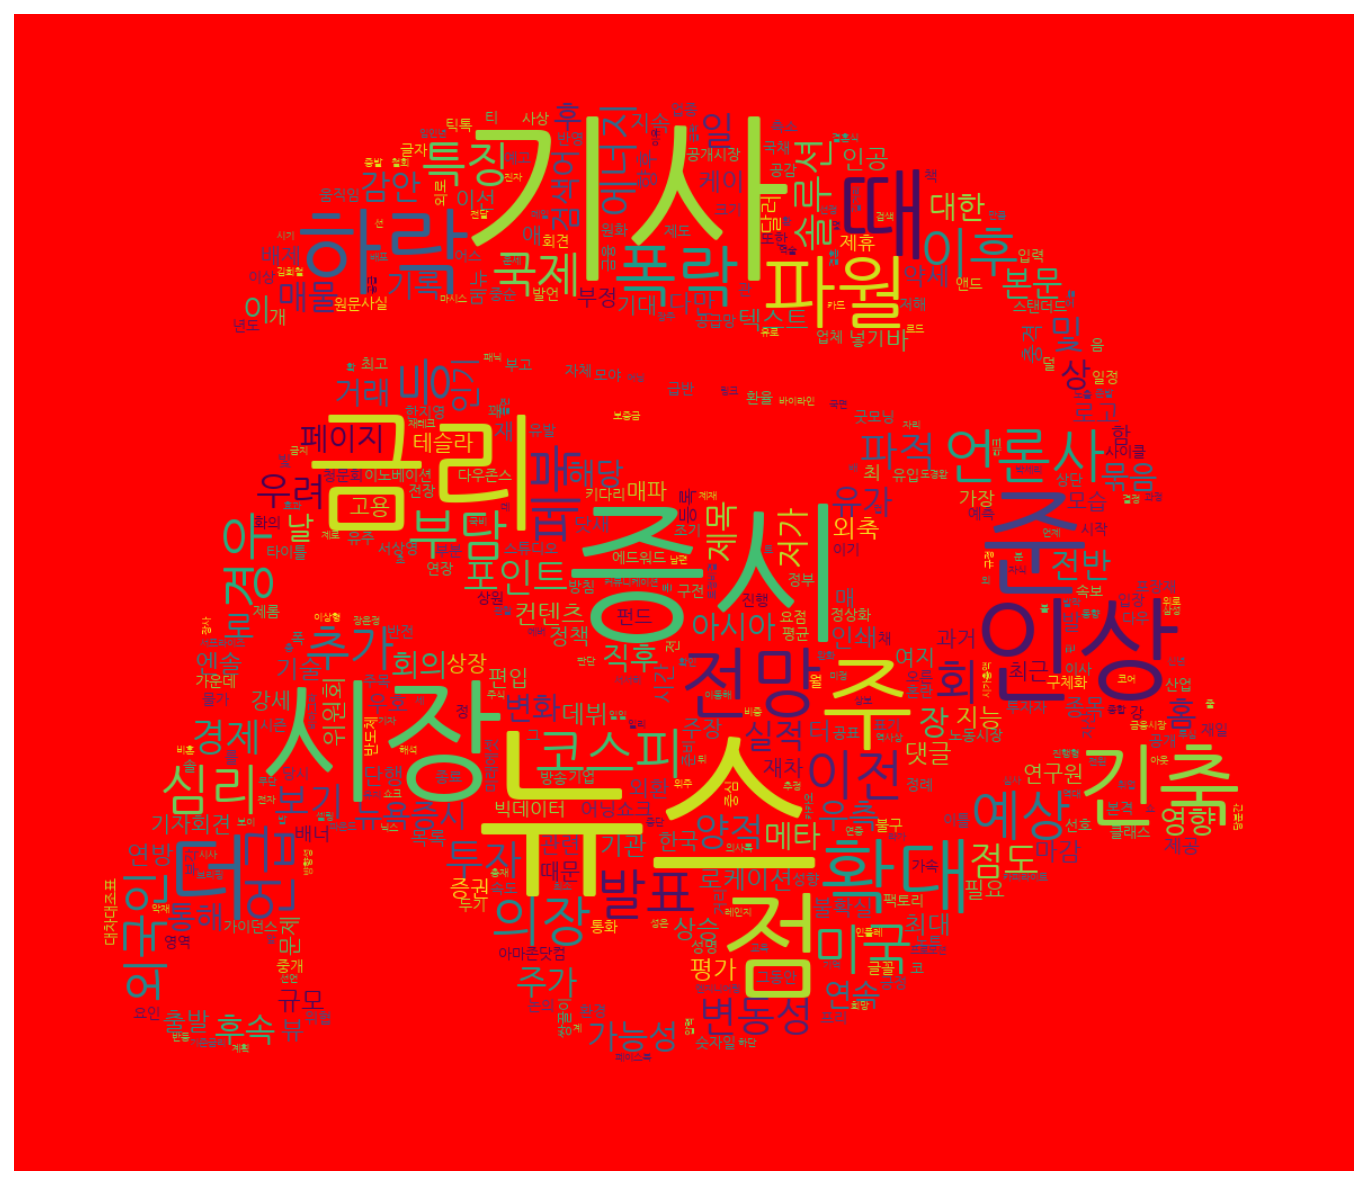

In [55]:
wc=WordCloud(font_path='NanumGothic',background_color="red", max_words=2000, mask=starwars,stopwords=stopwords)
gen = wc.generate_from_frequencies(words)
plt.figure(figsize=(12,12))
plt.imshow(gen,interpolation='bilinear')
plt.axis("off")
plt.show()

###  위에처럼 LG에너지솔루션 관련  웹크롤링 및 워드클라우드 시각화를 통해

###  관련 언급이 파월,인상,금리,하락,증시,긴축 등등이 크게 나온다

### 이제 위에 언급한 LG에너지솔루션 종목을 분석해본다.

In [56]:
#1. 야후증권 데이터를 불러오기
from pandas_datareader import data as pdr  #야후증권 데이터를 요청하기 위한 pandas_datareader
import yfinance as yf  #야후증권 데이터 모듈을 임포트
yf.pdr_override()  #야후증권 데이터사용을 위한 허가

#2. 증권 데이터 요청시 종목명/종목코드를 불러오기
#ex)국내주식변수=pdr_data_yahoo('종목코드',start='시작일',end='종료일') 

#국내종목은 6자리 종목코드 뒤에 .코스피(KS) 코스닥이면(KQ)  EX)삼성전자는 005930.KS로 조회.
#LG에너지솔루션의 종목코드를 이용해 데이터 불러오기.
LG=pdr.get_data_yahoo('373220.KS', start='2022-01-26')  


print(LG)

#open:장 시작가격 high:장중 상한가 low:장중 하한가 close:장 종료가격 volume:거래량 adj close: 수정종가

[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2022-01-27  597000.0  598000.0  450000.0  505000.0   505000.0  15946992
2022-01-28  476000.0  483000.0  445000.0  450000.0   450000.0   4559773
2022-02-03  458000.0  495500.0  441000.0  477000.0   477000.0   2918435
2022-02-04  476500.0  505000.0  476000.0  504000.0   504000.0   2088996
2022-02-07  520000.0  548000.0  511000.0  548000.0   548000.0   1911176
2022-02-08  548000.0  548000.0  548000.0  548000.0   548000.0         0
2022-02-09  550000.0  557000.0  505000.0  511000.0   511000.0   2070704
2022-02-10  507000.0  507000.0  480500.0  481000.0   481000.0   1151498


## 위에 보면 오늘 상장하다보니 아침 시작가는 597000원이고 장 종료가격은 505000원으로 끝남.
## 이거를 시각화해봄.

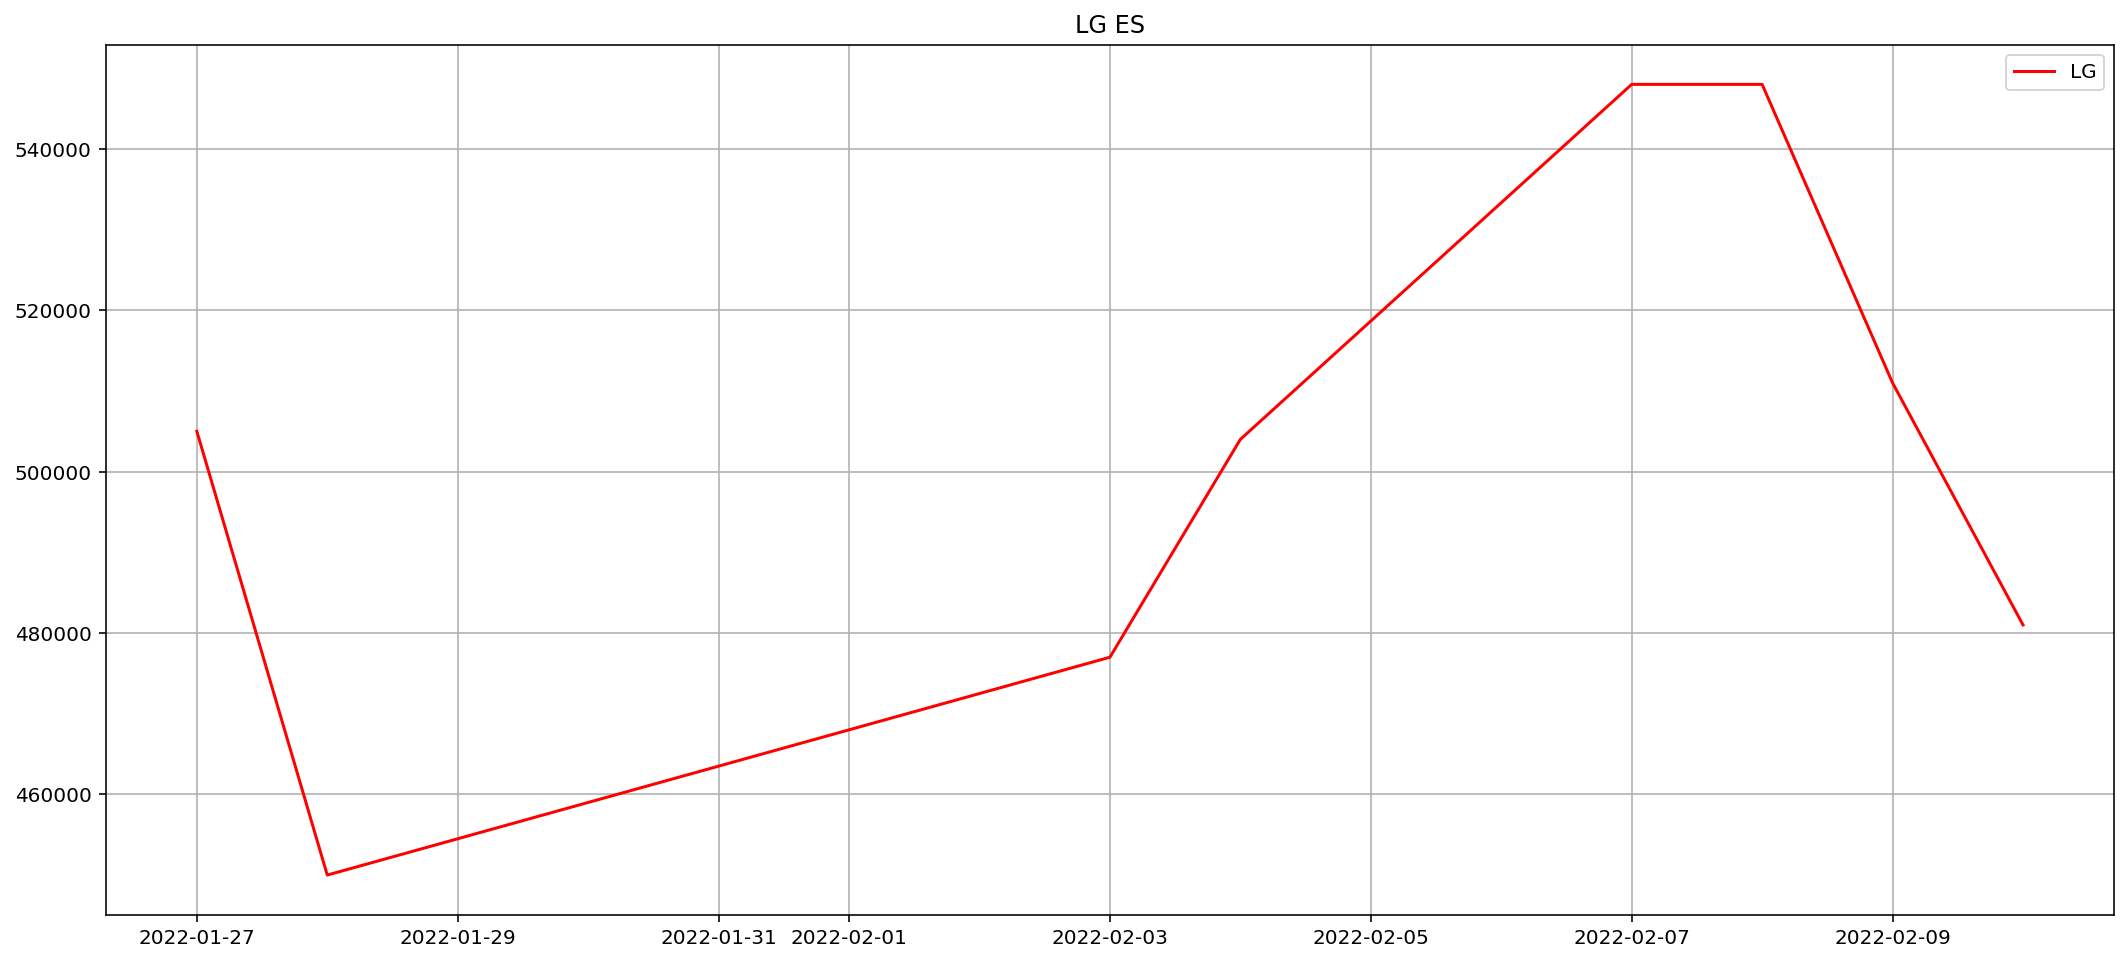

In [57]:
import matplotlib.pyplot as plt  #데이터 시각화
plt.figure(figsize=(18,8))
#plot(x,y,마커 형태,label='')
#plot(x좌표는 현대 데이터프레임의 날짜 인덱스, y좌표는 현대 데이터프레임의 종가(close), 마커형태는 블루, 범례표시이름)
plt.plot(LG.index,LG.Close, 'r', label='LG') 



plt.title('LG ES')
plt.legend(loc='best')  #범례표시( loc=best하면 제일 좋은자리에 표시)
plt.grid(True) # 배경 점선
plt.show()
#open:장 시작가격  high:장중 상한가 low:장중 하한가 close:장종료가격 volume:거래량  adj close:수정종가
#x좌표는 데이터프레임의 날짜 인덱스, y좌표는 종가데이터,색상,loc=best는 그래프가 표시되지 않는 부분을 찾아서 적당한 위치에 범례표시

## 위에 보면 lg에너지솔루션이 22/1/27일 상장하다보니 아직 차트에 안나옴.
## 그래서 같은 2차전지 업종인 삼성sdi의 주가를 불러와봄.

In [58]:

from pandas_datareader import data as pdr  
import yfinance as yf  #야후증권 데이터 모듈을 임포트
yf.pdr_override()  #야후증권 데이터사용을 위한 허가



samsung=pdr.get_data_yahoo('006400.KS', start='2021-12-01')  


print(samsung)

#open:장 시작가격 high:장중 상한가 low:장중 하한가 close:장 종료가격 volume:거래량 adj close: 수정종가

[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close    Adj Close  Volume
Date                                                                   
2021-12-01  694000.0  698000.0  680000.0  693000.0  691935.5000  226286
2021-12-02  688000.0  696000.0  680000.0  685000.0  683947.8125  291867
2021-12-03  682000.0  699000.0  681000.0  692000.0  690937.0625  260528
2021-12-06  692000.0  703000.0  683000.0  698000.0  696927.8125  162519
2021-12-07  701000.0  702000.0  684000.0  691000.0  689938.5625  172060
2021-12-08  700000.0  719000.0  695000.0  710000.0  708909.3750  264783
2021-12-09  714000.0  717000.0  705000.0  708000.0  706912.4375  313022
2021-12-10  705000.0  711000.0  697000.0  709000.0  707910.9375  183639
2021-12-13  709000.0  720000.0  702000.0  703000.0  701920.1250  159194
2021-12-14  697000.0  698000.0  680000.0  680000.0  678955.5000  293090
2021-12-15  674000.0  678000.0  661000.0  674000.0  672964.6875  32

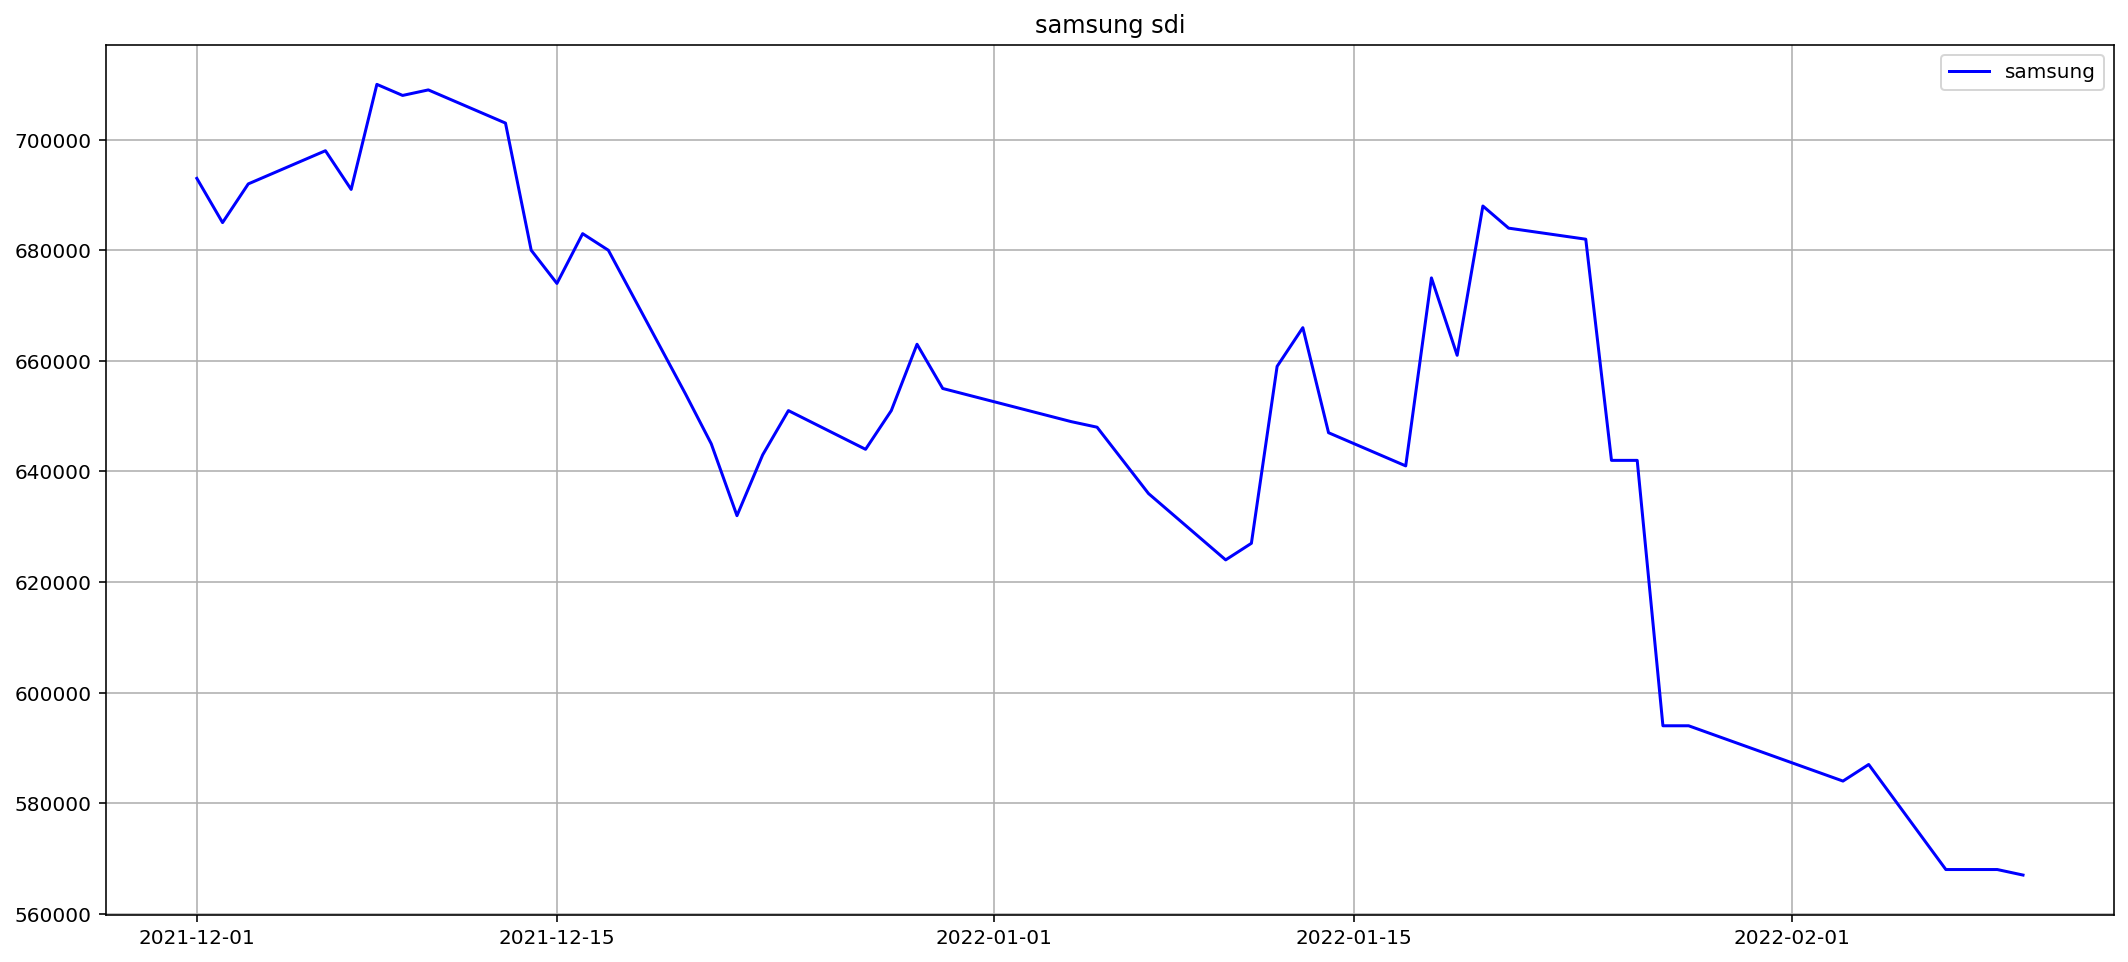

In [59]:
import matplotlib.pyplot as plt  #데이터 시각화
plt.figure(figsize=(18,8))
#plot(x,y,마커 형태,label='')
#plot(x좌표는 현대 데이터프레임의 날짜 인덱스, y좌표는 현대 데이터프레임의 종가(close), 마커형태는 블루, 범례표시이름)
plt.plot(samsung.index,samsung.Close, 'b', label='samsung') 

plt.title('samsung sdi')
plt.legend(loc='best')  #범례표시( loc=best하면 제일 좋은자리에 표시)
plt.grid(True) # 배경 점선
plt.show()
#open:장 시작가격  high:장중 상한가 low:장중 하한가 close:장종료가격 volume:거래량  adj close:수정종가
#x좌표는 데이터프레임의 날짜 인덱스, y좌표는 종가데이터,색상,loc=best는 그래프가 표시되지 않는 부분을 찾아서 적당한 위치에 범례표시

## 일단 차트를 보면 오늘 지수도 많이 떨어지다보니 삼성sdi도 많이 떨어진걸 볼수있음.

## 이제 좀 더 편하게 분석하기위해 캔들 차트로 변경해봄.

In [30]:
pip install --upgrade mplfinance 

Note: you may need to restart the kernel to use updated packages.


엠피엘파이낸스의 가장 큰 장점은 OHLC데이터 칼럼과 날짜시간 인덱스(datetimeindex)를 포함한 데이터 프레임만 있으면 기존에 사용자들이 수동으로 처리했던 데이터 변환 작업을 모두 자동화해줌.

import mplfinance as mpf


mpf.plot(OHLC 데이터프레임[,title=제목] [,type=차트형태][,mav=이동평균선][,volume=거래량 표시][,ylabel=y축 레이블])

[*********************100%***********************]  1 of 1 completed


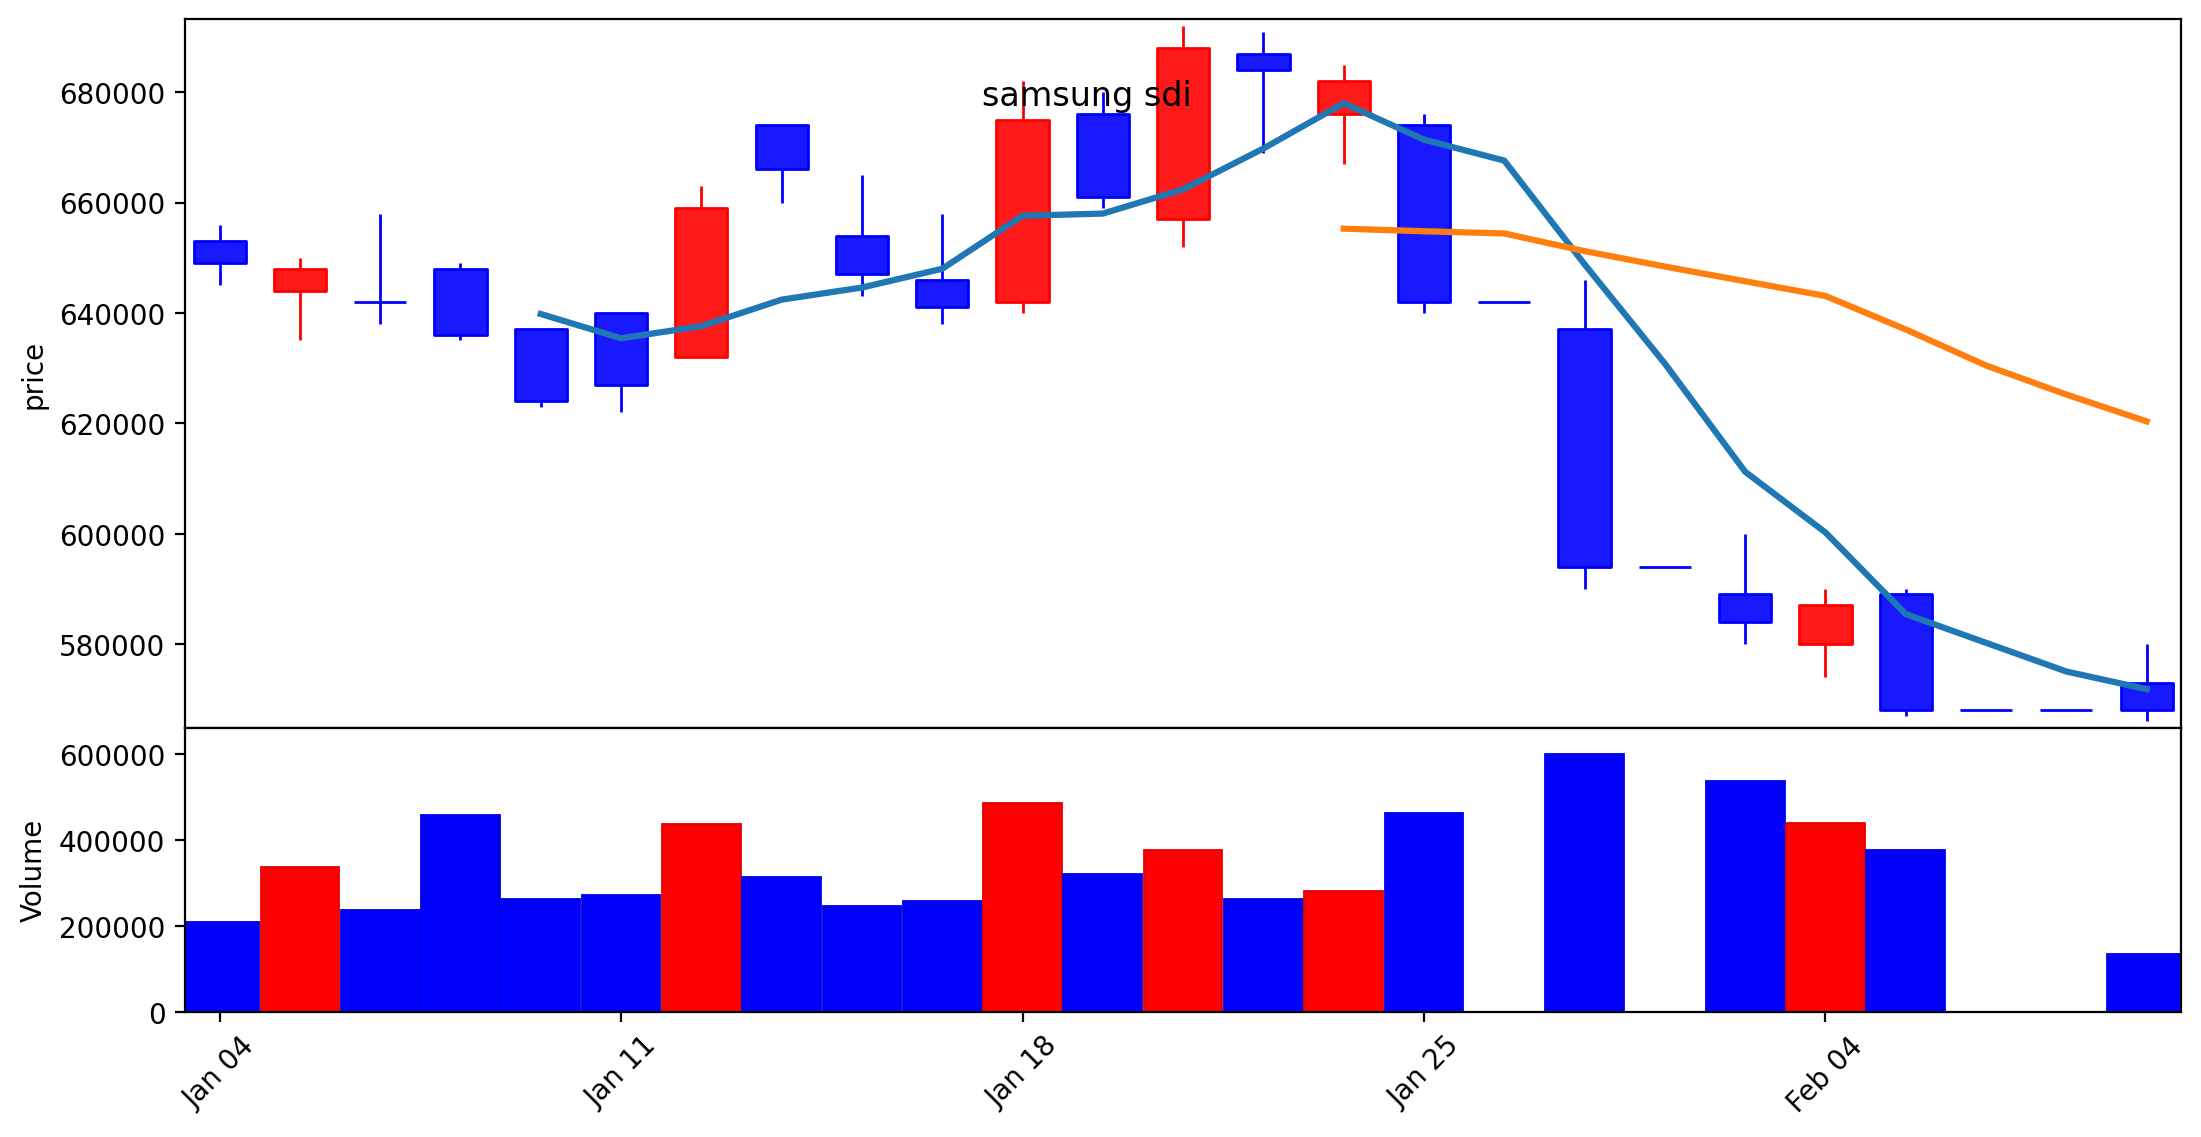

In [60]:
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf
#국내종목은 6자리 종목코드 뒤에 .코스피(KS) 코스닥이면(KQ)  EX)삼성전자는 005930.KS로 조회.

samsung=pdr.get_data_yahoo('006400.KS', start='2022-01-01')

#make_marketcolors로 차트의 색상들을 지정할수있음. 
#wick는 하루의 고가,저가를 나타내는 선의 색 지정. 
#inherit는 거래량의 색상도 차트색상과 동일하게변경
mc=mpf.make_marketcolors(up='r',down='b',wick={'up': 'red', 'down': 'blue'}
,inherit=True)
s=mpf.make_mpf_style(marketcolors=mc)
#피그래티오는 그래프의 크기 설정, 타잇-레이아웃은 좌우 공백 제거
mpf.plot(samsung,type='candle',mav=(5,15,60),volume=True,title='samsung sdi',ylabel='price',xrotation=45,figratio=(10,5),tight_layout=True,
        style=s)

## 위에 보면 알겠지만 이동평균선 5일선과 20일선을 깨버리고 바닥으로 내려옴
## 다음주 추가하락 불가피

[*********************100%***********************]  1 of 1 completed


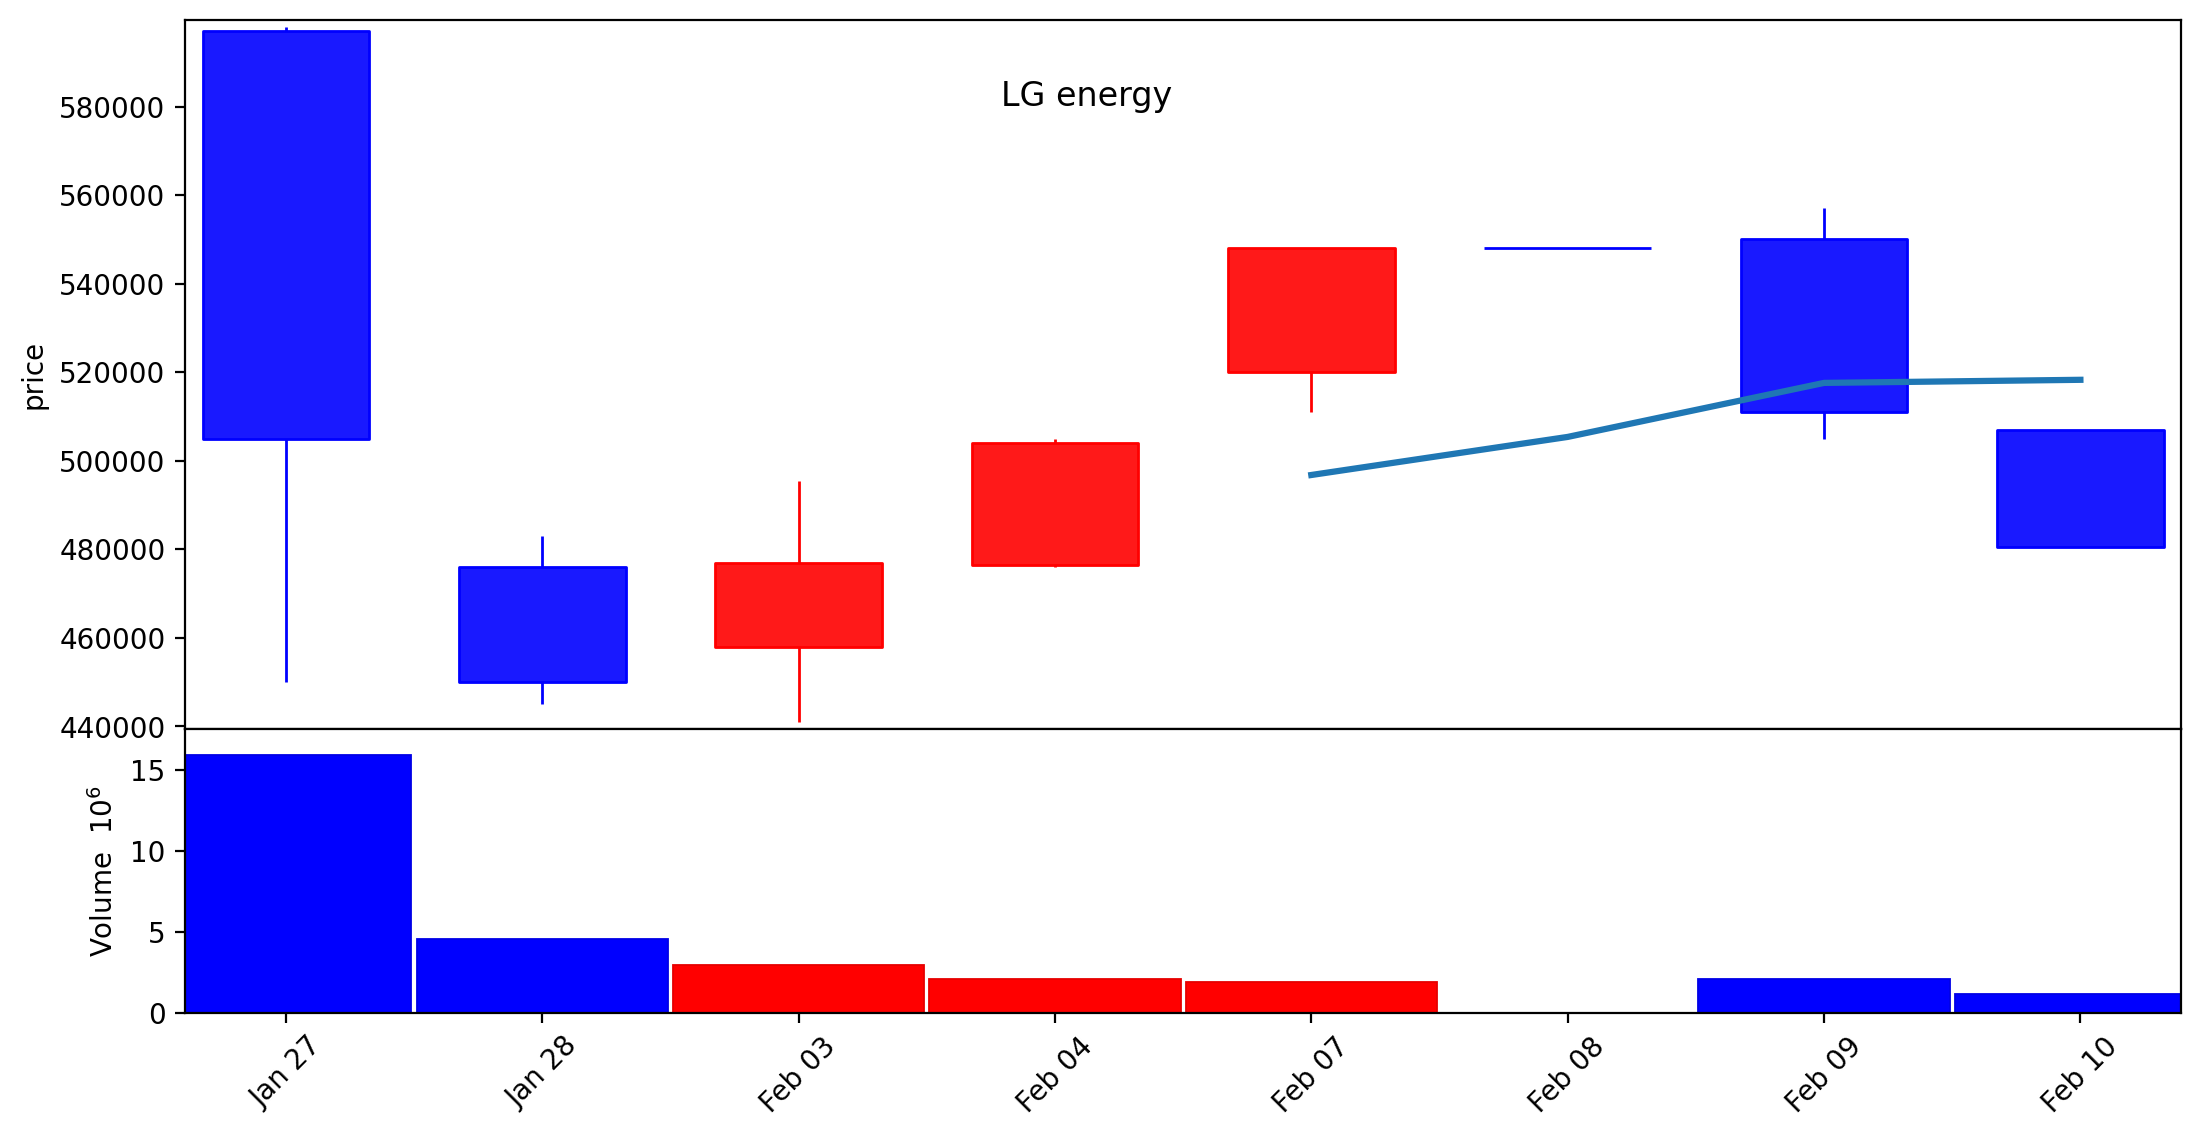

In [61]:
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf
#국내종목은 6자리 종목코드 뒤에 .코스피(KS) 코스닥이면(KQ)  EX)삼성전자는 005930.KS로 조회.

LG=pdr.get_data_yahoo('373220.KS', start='2022-01-01')

#make_marketcolors로 차트의 색상들을 지정할수있음. 
#wick는 하루의 고가,저가를 나타내는 선의 색 지정. 
#inherit는 거래량의 색상도 차트색상과 동일하게변경
mc=mpf.make_marketcolors(up='r',down='b',wick={'up': 'red', 'down': 'blue'}
,inherit=True)
s=mpf.make_mpf_style(marketcolors=mc)
#피그래티오는 그래프의 크기 설정, 타잇-레이아웃은 좌우 공백 제거
mpf.plot(LG,type='candle',mav=(5,15,60),volume=True,title='LG energy',ylabel='price',xrotation=45,figratio=(10,5),tight_layout=True,
        style=s)

## 위에 lg에너지솔루션이 그냥 차트는 안나오지만 캔들 차트는 나옴 

###  역시나 하락이다 . 처음에 lg에너지솔루션 키워드를 분석한결과 
###  파월,금리,인상 등등 을 통해 주식이 하락한걸로 결론을 도출가능함.